In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
from datetime import datetime

In [2]:
import seaborn as sns
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
%matplotlib inline
plt.style.use("ggplot")

In [3]:
import yfinance as yf

In [4]:
df = yf.download('GOOGL')
df

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  \
Date                                                                    
2004-08-19 00:00:00-04:00   2.502503   2.604104   2.401401   2.511011   
2004-08-20 00:00:00-04:00   2.527778   2.729730   2.515015   2.710460   
2004-08-23 00:00:00-04:00   2.771522   2.839840   2.728979   2.737738   
2004-08-24 00:00:00-04:00   2.783784   2.792793   2.591842   2.624374   
2004-08-25 00:00:00-04:00   2.626627   2.702703   2.599600   2.652653   
...                              ...        ...        ...        ...   
2023-01-10 00:00:00-05:00  85.980003  88.669998  85.830002  88.419998   
2023-01-11 00:00:00-05:00  89.180000  91.599998  89.010002  91.519997   
2023-01-12 00:00:00-05:00  91.480003  91.870003  89.750000  91.129997   
2023-01-13 00:00:00-05:00  90.849998  92.190002  90.129997  92.120003   
2023-01-17 00:00:00-05:00  92.059998  92.250000  90.050003  91.290001   

                           Adj Close     Volume  
Date                                             
2004-08-19 00:00:00-04:00   2.511011  893181924  
2004-08-20 00:00:00-04:00   2.710460  456686856  
2004-08-23 00:00:00-04:00   2.737738  365122512  
2004-08-24 00:00:00-04:00   2.624374  304946748  
2004-08-25 00:00:00-04:00   2.652653  183772044  
...                              ...        ...  
2023-01-10 00:00:00-05:00  88.419998   30467800  
2023-01-11 00:00:00-05:00  91.519997   26862000  
2023-01-12 00:00:00-05:00  91.129997   30258100  
2023-01-13 00:00:00-05:00  92.120003   26309900  
2023-01-17 00:00:00-05:00  91.290001   32561200  

[4635 rows x 6 columns]

In [6]:
df.reset_index(drop=True, inplace=True)
df

Open       High        Low      Close  Adj Close     Volume
0      2.502503   2.604104   2.401401   2.511011   2.511011  893181924
1      2.527778   2.729730   2.515015   2.710460   2.710460  456686856
2      2.771522   2.839840   2.728979   2.737738   2.737738  365122512
3      2.783784   2.792793   2.591842   2.624374   2.624374  304946748
4      2.626627   2.702703   2.599600   2.652653   2.652653  183772044
...         ...        ...        ...        ...        ...        ...
4630  85.980003  88.669998  85.830002  88.419998  88.419998   30467800
4631  89.180000  91.599998  89.010002  91.519997  91.519997   26862000
4632  91.480003  91.870003  89.750000  91.129997  91.129997   30258100
4633  90.849998  92.190002  90.129997  92.120003  92.120003   26309900
4634  92.059998  92.250000  90.050003  91.290001  91.290001   32561200

[4635 rows x 6 columns]

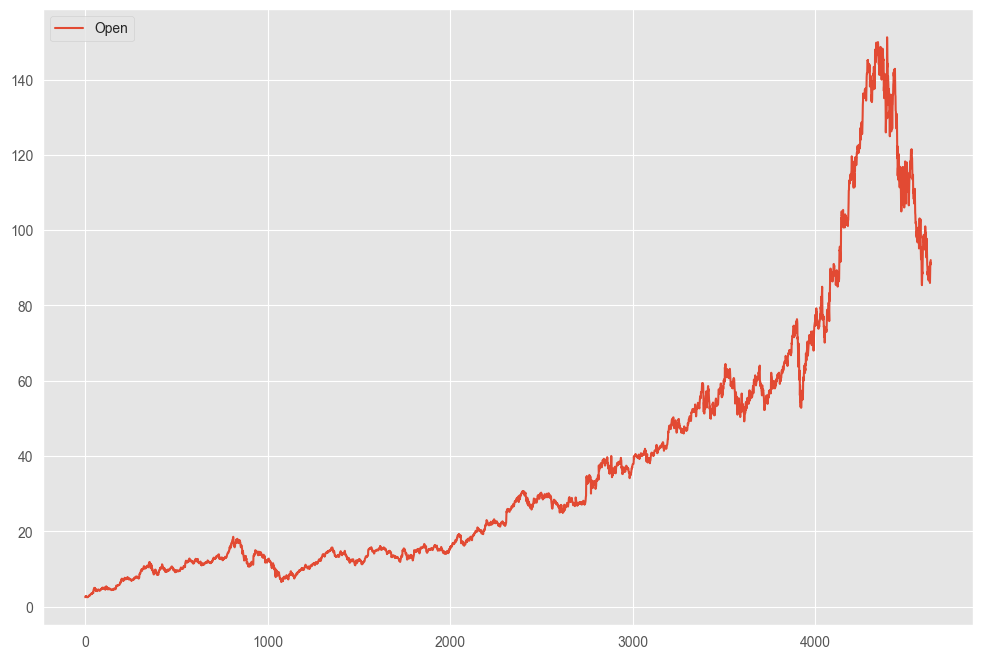

In [15]:
df["Open"].plot(legend=True, subplots=True, figsize=(12,8))
plt.show()

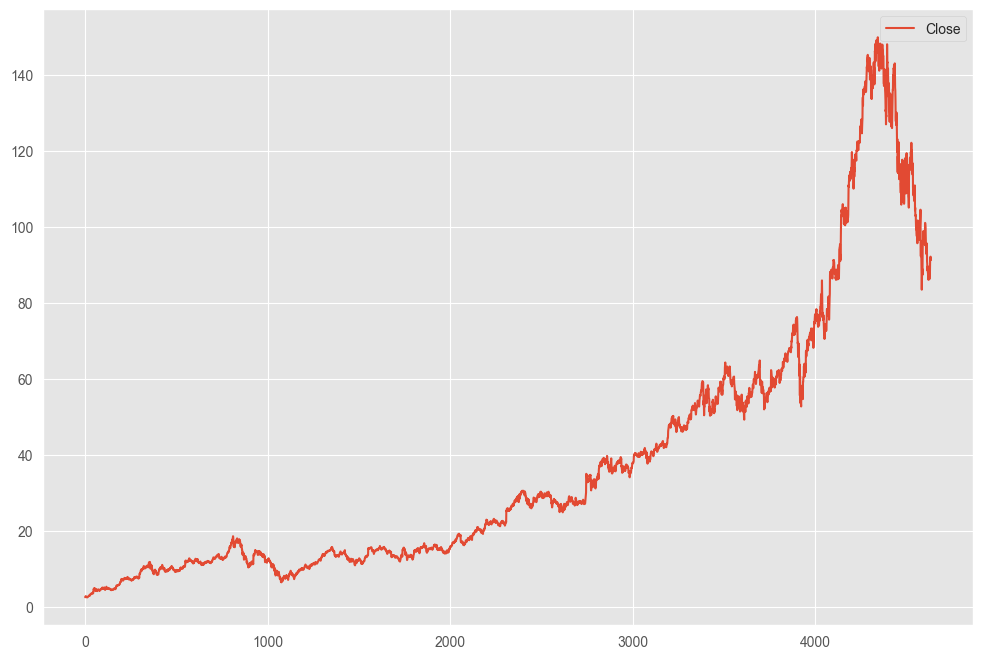

In [14]:
df["Close"].plot(legend=True, subplots=True, figsize=(12,8))
plt.show()

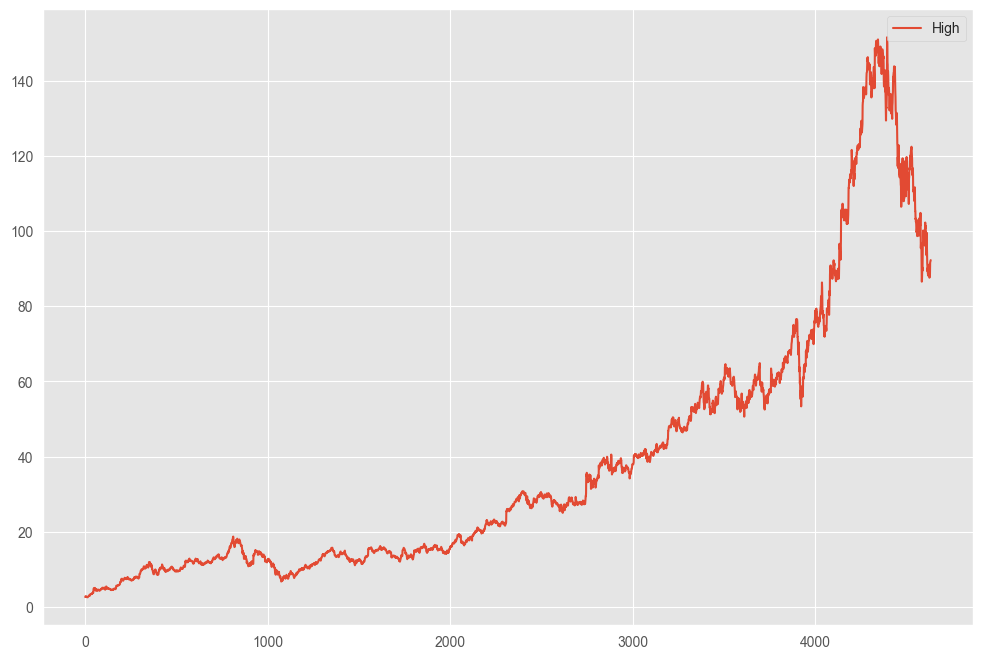

In [16]:
df["High"].plot(legend=True, subplots=True, figsize=(12,8))
plt.show()

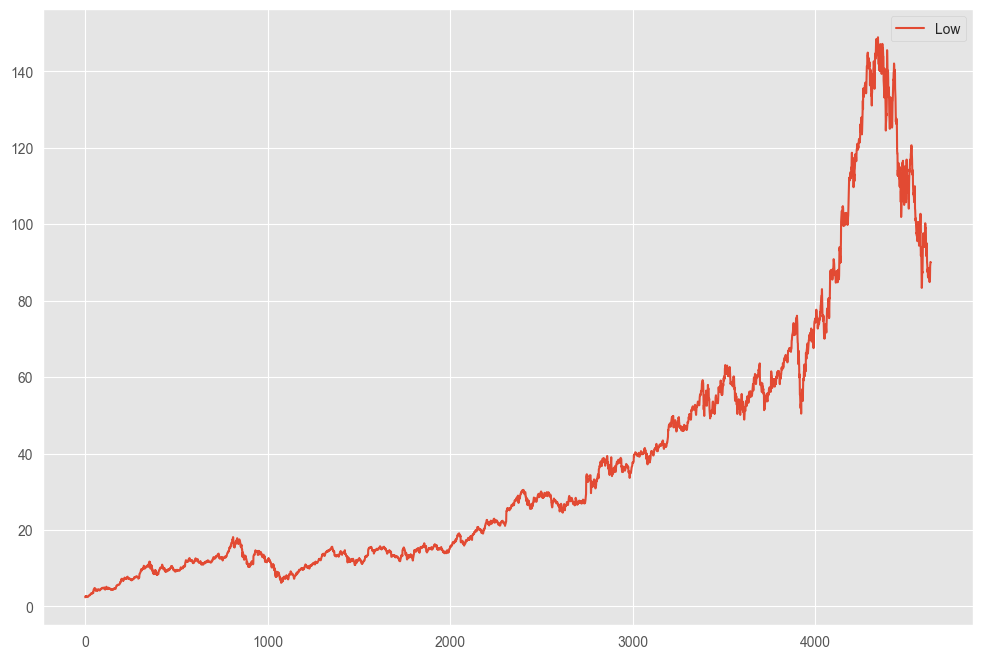

In [17]:
df["Low"].plot(legend=True, subplots=True, figsize=(12,8))
plt.show()

In [18]:
df.describe(include='all')

Open         High          Low        Close    Adj Close  \
count  4635.000000  4635.000000  4635.000000  4635.000000  4635.000000   
mean     37.874302    38.259387    37.472372    37.872530    37.872530   
std      35.039031    35.417859    34.645532    35.035958    35.035958   
min       2.482232     2.546046     2.401401     2.502753     2.502753   
25%      12.664915    12.777402    12.481356    12.648649    12.648649   
50%      25.193945    25.464464    25.013763    25.290039    25.290039   
75%      54.188749    54.740000    53.535250    54.204248    54.204248   
max     151.250000   151.546494   148.899002   149.838501   149.838501   

             Volume  
count  4.635000e+03  
mean   1.246851e+08  
std    1.516820e+08  
min    9.312000e+06  
25%    3.299100e+07  
50%    7.020572e+07  
75%    1.537041e+08  
max    1.643023e+09

In [10]:
df.fillna(df.mean(), inplace=True)
df.head()

Open      High       Low     Close  Adj Close     Volume
0  2.502503  2.604104  2.401401  2.511011   2.511011  893181924
1  2.527778  2.729730  2.515015  2.710460   2.710460  456686856
2  2.771522  2.839840  2.728979  2.737738   2.737738  365122512
3  2.783784  2.792793  2.591842  2.624374   2.624374  304946748
4  2.626627  2.702703  2.599600  2.652653   2.652653  183772044

In [20]:
ma_day = [10, 50, 100]

for ma in ma_day:
    column_name = "MA for {} days".format(str(ma))
    df[column_name] = pd.DataFrame.rolling(df['Close'], ma).mean()

In [22]:
df.head(20)

Open      High       Low     Close  Adj Close     Volume  \
0   2.502503  2.604104  2.401401  2.511011   2.511011  893181924   
1   2.527778  2.729730  2.515015  2.710460   2.710460  456686856   
2   2.771522  2.839840  2.728979  2.737738   2.737738  365122512   
3   2.783784  2.792793  2.591842  2.624374   2.624374  304946748   
4   2.626627  2.702703  2.599600  2.652653   2.652653  183772044   
5   2.626376  2.701451  2.619119  2.700450   2.700450  141897960   
6   2.705205  2.718218  2.644895  2.656406   2.656406  124235640   
7   2.634635  2.639890  2.552803  2.552803   2.552803  103935960   
8   2.560060  2.595345  2.556557  2.561812   2.561812   98357544   
9   2.570070  2.576827  2.494244  2.508759   2.508759  182765052   
10  2.482232  2.561812  2.475976  2.540290   2.540290  302373324   
11  2.526276  2.546046  2.485485  2.502753   2.502753  103048848   
12  2.527778  2.552553  2.492743  2.542042   2.542042  116950932   
13  2.521021  2.578328  2.515015  2.560060   2.560060   99712188   
14  2.565816  2.570320  2.527528  2.560310   2.560310   81234684   
15  2.542543  2.666667  2.535035  2.635886   2.635886  173977848   
16  2.668418  2.712963  2.664164  2.690190   2.690190  156882960   
17  2.688939  2.802803  2.672422  2.790040   2.790040  216579204   
18  2.766767  2.858609  2.757758  2.802803   2.802803  214261524   
19  2.811311  2.897898  2.794044  2.852102   2.852102  185326488   

    MA for 10 days  MA for 50 days  MA for 100 days  
0              NaN             NaN              NaN  
1              NaN             NaN              NaN  
2              NaN             NaN              NaN  
3              NaN             NaN              NaN  
4              NaN             NaN              NaN  
5              NaN             NaN              NaN  
6              NaN             NaN              NaN  
7              NaN             NaN              NaN  
8              NaN             NaN              NaN  
9         2.621647             NaN              NaN  
10        2.624574             NaN              NaN  
11        2.603804             NaN              NaN  
12        2.584234             NaN              NaN  
13        2.577803             NaN              NaN  
14        2.568568             NaN              NaN  
15        2.562112             NaN              NaN  
16        2.565491             NaN              NaN  
17        2.589214             NaN              NaN  
18        2.613313             NaN              NaN  
19        2.647648             NaN              NaN

In [23]:
df['Daily Return']=df['Close'].pct_change()

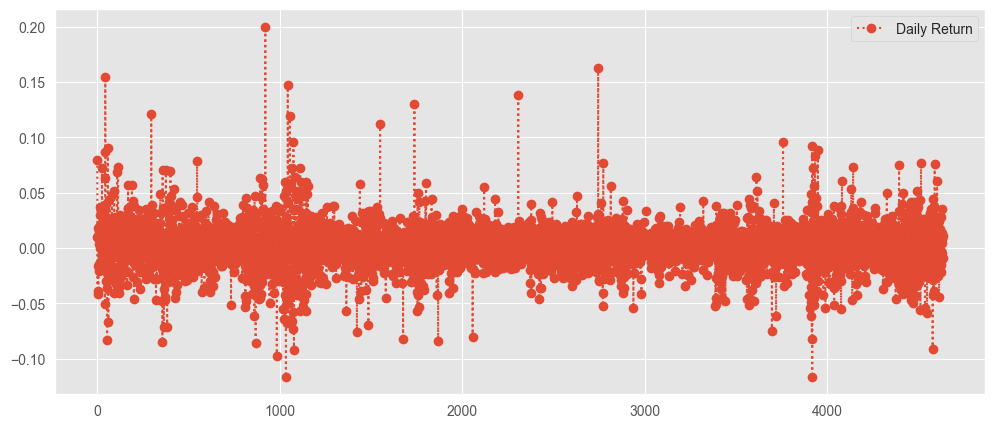

In [24]:
df['Daily Return'].plot(figsize=(12,5), legend=True, linestyle=':', marker='o')
plt.show()

C:\Users\subha\AppData\Local\Temp\ipykernel_7584\1776071102.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Daily Return'].dropna(), bins=100, color='green')


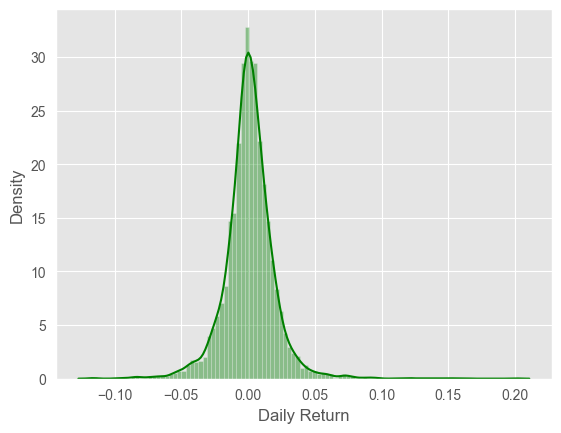

In [25]:
sns.distplot(df['Daily Return'].dropna(), bins=100, color='green')
plt.show()

In [26]:
# closing_df = pd.DataFrame(df['Close'])
# close1 = closing_df.rename

In [27]:
cols = list(df.columns)
cols

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'MA for 10 days',
 'MA for 50 days',
 'MA for 100 days',
 'Daily Return']

Text(0, 0.5, 'Closing price')

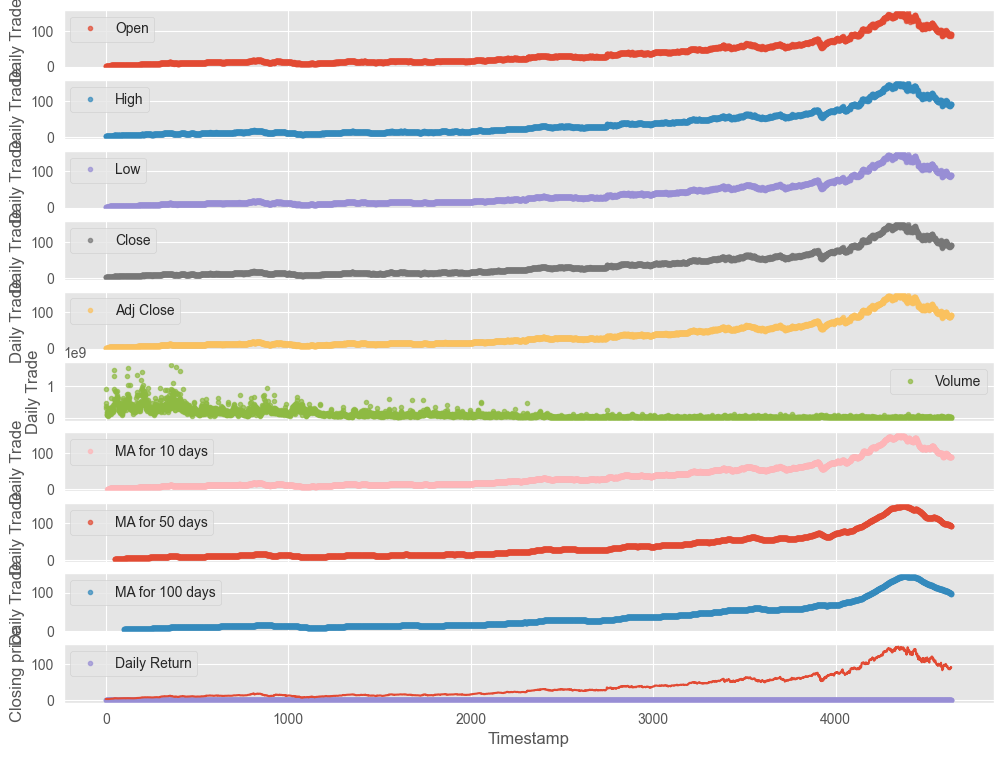

In [30]:
axes=df[cols].plot(marker='.', alpha=0.7, linestyle='None', figsize=(12,9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Trade')
    
plt.plot(df['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")

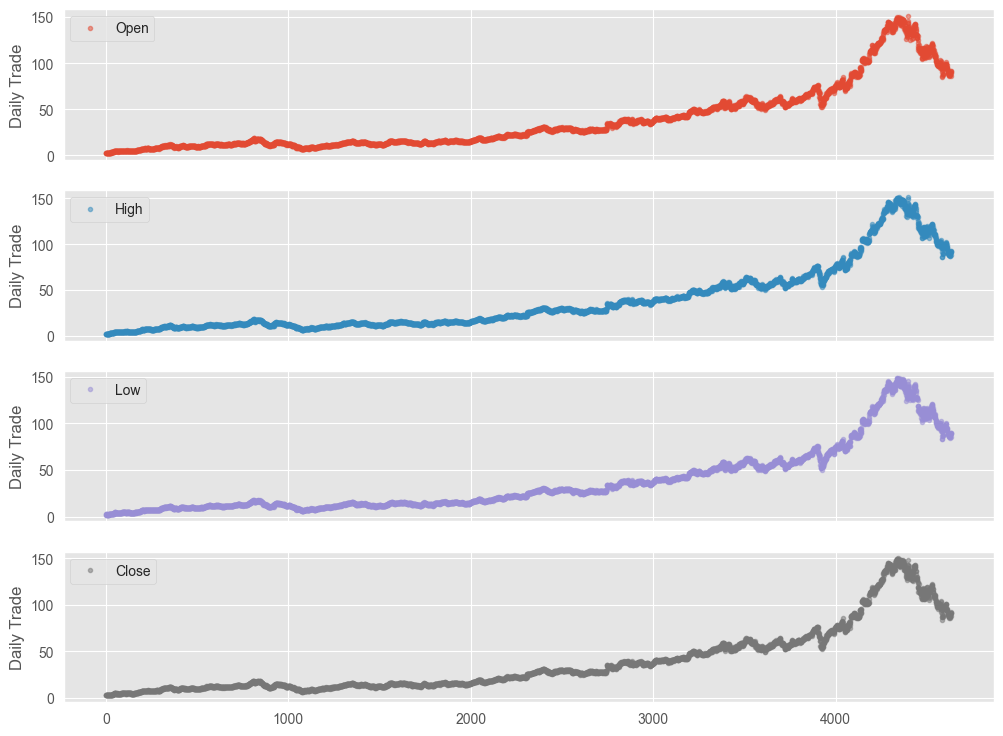

In [32]:
plotting = ['Open', 'High', 'Low' ,'Close']
axes = df[plotting].plot(marker='.', alpha=0.5, linestyle='None', figsize=(12,9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Trade')

In [33]:
df.isnull().sum()

Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
MA for 10 days      9
MA for 50 days     49
MA for 100 days    99
Daily Return        1
dtype: int64

Text(0, 0.5, 'Closing Price')

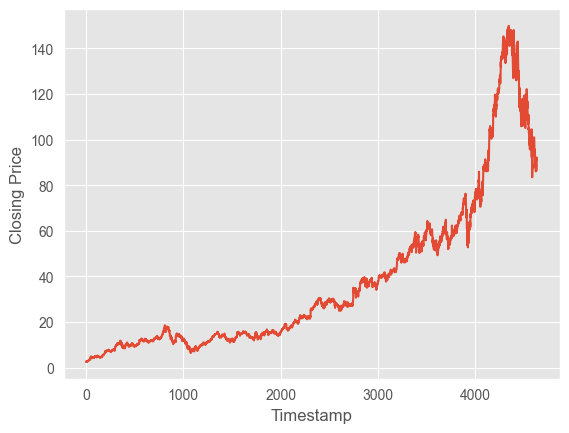

In [35]:
plt.plot(df['Close'], label='Close Price')
plt.xlabel("Timestamp")
plt.ylabel("Closing Price")


In [36]:
df.describe().transpose()

count          mean           std           min  \
Open             4635.0  3.787430e+01  3.503903e+01  2.482232e+00   
High             4635.0  3.825939e+01  3.541786e+01  2.546046e+00   
Low              4635.0  3.747237e+01  3.464553e+01  2.401401e+00   
Close            4635.0  3.787253e+01  3.503596e+01  2.502753e+00   
Adj Close        4635.0  3.787253e+01  3.503596e+01  2.502753e+00   
Volume           4635.0  1.246851e+08  1.516820e+08  9.312000e+06   
MA for 10 days   4626.0  3.785583e+01  3.499570e+01  2.562112e+00   
MA for 50 days   4586.0  3.777331e+01  3.482800e+01  3.179349e+00   
MA for 100 days  4536.0  3.763779e+01  3.457698e+01  3.863238e+00   
Daily Return     4634.0  9.615628e-04  1.935404e-02 -1.163415e-01   

                          25%           50%           75%           max  
Open             1.266492e+01  2.519394e+01  5.418875e+01  1.512500e+02  
High             1.277740e+01  2.546446e+01  5.474000e+01  1.515465e+02  
Low              1.248136e+01  2.501376e+01  5.353525e+01  1.488990e+02  
Close            1.264865e+01  2.529004e+01  5.420425e+01  1.498385e+02  
Adj Close        1.264865e+01  2.529004e+01  5.420425e+01  1.498385e+02  
Volume           3.299100e+07  7.020572e+07  1.537041e+08  1.643023e+09  
MA for 10 days   1.268429e+01  2.549600e+01  5.415479e+01  1.481427e+02  
MA for 50 days   1.294386e+01  2.460293e+01  5.442549e+01  1.456361e+02  
MA for 100 days  1.301612e+01  2.470070e+01  5.445086e+01  1.430221e+02  
Daily Return    -7.920442e-03  7.476634e-04  1.001353e-02  1.999154e-01

The data has been analysed but it must be converted into data of shape [100,1] to make it easier for CNN to train on... Else it won't select necessary features and the model will fail

In [146]:
df.head()

Open      High       Low     Close  Adj Close     Volume  \
99   4.867367  4.957457  4.800551  4.881381   4.881381  301282416   
100  4.895395  4.947698  4.834334  4.843343   4.843343  278069652   
101  4.863113  4.903153  4.767267  4.889389   4.889389  326784888   
102  4.889389  4.939690  4.856106  4.888138   4.888138  273702024   
103  4.904905  5.005255  4.858108  5.004254   5.004254  385226388   

     MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
99         4.865440        4.547127         3.863238      0.006242  
100        4.867392        4.548579         3.886562     -0.007793  
101        4.873598        4.548253         3.908351      0.009507  
102        4.867918        4.548484         3.929855     -0.000256  
103        4.885886        4.552638         3.953654      0.023755

In [147]:
from sklearn.model_selection import train_test_split

x=[]
y=[]
window_size=100

for i in range(1, len(df)-window_size-1, 1):
    first = df.iloc[i, 3]
    temp=[]
    temp2=[]
    for j in range(window_size):
        temp.append((df.iloc[i+j, 2]-first)/first)
    temp2.append((df.iloc[i+window_size, 2]-first)/first)
    x.append(np.array(temp).reshape(100, 1))
    y.append(np.array(temp2).reshape(1,1))
    

In [151]:
len(y), len(x), len(df)

(4439, 4439, 4541)

In [149]:
x

[array([[-0.00186006],
        [-0.01570724],
        [ 0.00263517],
        [ 0.00304857],
        [ 0.02645447],
        [ 0.01637928],
        [-0.0079569 ],
        [-0.0280044 ],
        [-0.06830605],
        [-0.08912867],
        [-0.0743515 ],
        [-0.04309169],
        [-0.0372015 ],
        [-0.00940355],
        [-0.0150354 ],
        [ 0.05228918],
        [ 0.06339782],
        [ 0.04681209],
        [ 0.01017896],
        [ 0.00511527],
        [-0.02108085],
        [-0.04283335],
        [-0.03859666],
        [-0.06479259],
        [-0.00237663],
        [ 0.00392686],
        [ 0.01689585],
        [ 0.01612074],
        [-0.01627551],
        [-0.02521436],
        [-0.05843751],
        [-0.04149007],
        [-0.03973329],
        [-0.05962573],
        [-0.04743185],
        [-0.04769038],
        [-0.04376352],
        [-0.03363645],
        [-0.0442801 ],
        [-0.06913275],
        [-0.08339364],
        [-0.08468523],
        [-0.10834946],
        [-0

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle=True)

In [39]:
train_x=np.array(x_train)
test_x=np.array(x_test)
train_y=np.array(y_train)
test_y=np.array(y_test)

In [41]:
train_x = train_x.reshape(train_x.shape[0], 1, 100, 1)
test_x = test_x.reshape(test_x.shape[0], 1, 100, 1)

In [49]:
len(x)

4533

In [50]:
len(train_x), len(test_x)

(3626, 907)


### Training part

This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers


In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy, RootMeanSquaredError

In [55]:
model = tf.keras.Sequential()
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))

## LSTM Layers

model.add(Bidirectional(GRU(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(100, return_sequences=False)))
model.add(Dropout(0.5))

## Final Layers

model.add(Dense(1, activation='linear'))

In [60]:
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [61]:
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=50, batch_size=50, verbose=1, shuffle=True)

Epoch 1/50
73/73 [==============================] - 12s 47ms/step - loss: 0.0135 - mse: 0.0135 - mae: 0.0844 - val_loss: 0.0073 - val_mse: 0.0073 - val_mae: 0.0638
Epoch 2/50
73/73 [==============================] - 2s 23ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0575 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0467
Epoch 3/50
73/73 [==============================] - 2s 23ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0509 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0436
Epoch 4/50
73/73 [==============================] - 2s 23ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0504 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0430
Epoch 5/50
73/73 [==============================] - 2s 23ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0496 - val_loss: 0.0044 - val_mse: 0.0044 - val_mae: 0.0510
Epoch 6/50
73/73 [==============================] - 2s 22ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0488 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0415
Epoch 7/50
73/73 [===

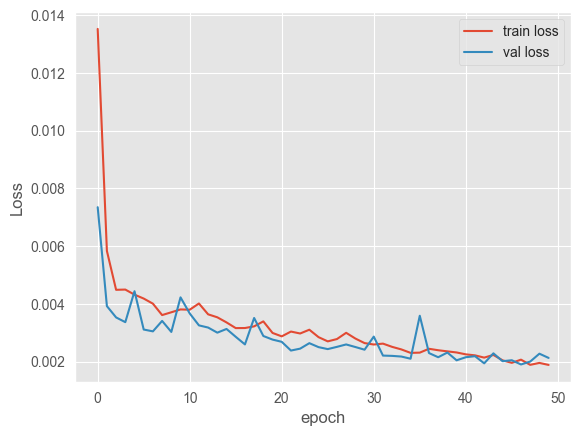

In [62]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

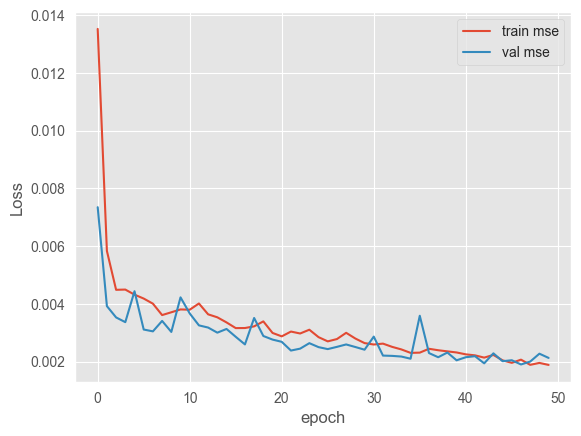

In [63]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

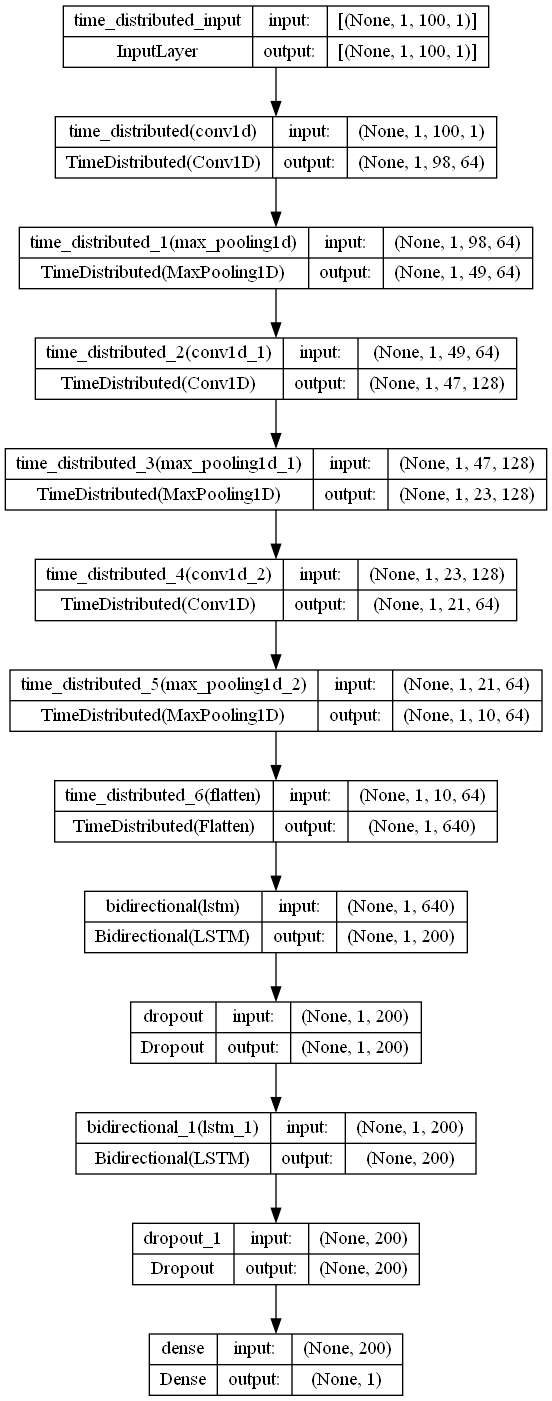

In [64]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [65]:
model.evaluate(test_x, test_y)

29/29 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0354


[0.002125808736309409, 0.002125808736309409, 0.035399384796619415]

In [67]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_x, verbose=1)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

29/29 [==============================] - 1s 5ms/step
Variance: 0.943655
R2 Score: 0.943655
Max Error: 0.196883


29/29 [==============================] - 0s 6ms/step


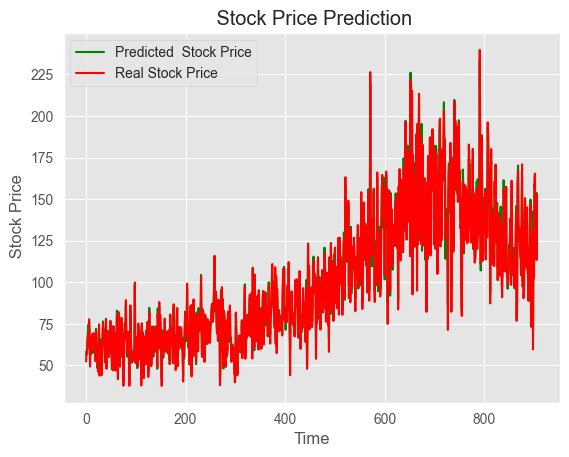

In [70]:
predicted  = model.predict(test_x)
test_label = test_y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_x)
for j in range(len_t , len_t + len(test_x)):
    temp = df.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [71]:
model.save('model-cnn-lstm.h5')

In [73]:
new_model = tf.keras.models.load_model('./model-cnn-lstm.h5')

In [75]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

In [100]:
df2=yf.download('MSFT')
df2

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close  \
Date                                                                        
1986-03-13 00:00:00-05:00    0.088542    0.101563    0.088542    0.097222   
1986-03-14 00:00:00-05:00    0.097222    0.102431    0.097222    0.100694   
1986-03-17 00:00:00-05:00    0.100694    0.103299    0.100694    0.102431   
1986-03-18 00:00:00-05:00    0.102431    0.103299    0.098958    0.099826   
1986-03-19 00:00:00-05:00    0.099826    0.100694    0.097222    0.098090   
...                               ...         ...         ...         ...   
2023-01-11 00:00:00-05:00  231.289993  235.949997  231.110001  235.770004   
2023-01-12 00:00:00-05:00  235.259995  239.899994  233.559998  238.509995   
2023-01-13 00:00:00-05:00  237.000000  239.369995  234.919998  239.229996   
2023-01-17 00:00:00-05:00  237.970001  240.910004  237.089996  240.350006   
2023-01-18 00:00:00-05:00  241.565002  242.378403  236.059998  236.339996   

                            Adj Close      Volume  
Date                                               
1986-03-13 00:00:00-05:00    0.060809  1031788800  
1986-03-14 00:00:00-05:00    0.062980   308160000  
1986-03-17 00:00:00-05:00    0.064067   133171200  
1986-03-18 00:00:00-05:00    0.062437    67766400  
1986-03-19 00:00:00-05:00    0.061351    47894400  
...                               ...         ...  
2023-01-11 00:00:00-05:00  235.770004    28669300  
2023-01-12 00:00:00-05:00  238.509995    27269500  
2023-01-13 00:00:00-05:00  239.229996    21317700  
2023-01-17 00:00:00-05:00  240.350006    29831300  
2023-01-18 00:00:00-05:00  236.339996    22298285  

[9288 rows x 6 columns]

In [101]:
df.dropna(inplace=True)
# df2.reset_index(drop=True, inplace=True)
df2.fillna(df2.mean(), inplace=True)
# df2=df2.drop('Date', axis=1)
df2

Open        High         Low       Close  \
Date                                                                        
1986-03-13 00:00:00-05:00    0.088542    0.101563    0.088542    0.097222   
1986-03-14 00:00:00-05:00    0.097222    0.102431    0.097222    0.100694   
1986-03-17 00:00:00-05:00    0.100694    0.103299    0.100694    0.102431   
1986-03-18 00:00:00-05:00    0.102431    0.103299    0.098958    0.099826   
1986-03-19 00:00:00-05:00    0.099826    0.100694    0.097222    0.098090   
...                               ...         ...         ...         ...   
2023-01-11 00:00:00-05:00  231.289993  235.949997  231.110001  235.770004   
2023-01-12 00:00:00-05:00  235.259995  239.899994  233.559998  238.509995   
2023-01-13 00:00:00-05:00  237.000000  239.369995  234.919998  239.229996   
2023-01-17 00:00:00-05:00  237.970001  240.910004  237.089996  240.350006   
2023-01-18 00:00:00-05:00  241.565002  242.378403  236.059998  236.339996   

                            Adj Close      Volume  
Date                                               
1986-03-13 00:00:00-05:00    0.060809  1031788800  
1986-03-14 00:00:00-05:00    0.062980   308160000  
1986-03-17 00:00:00-05:00    0.064067   133171200  
1986-03-18 00:00:00-05:00    0.062437    67766400  
1986-03-19 00:00:00-05:00    0.061351    47894400  
...                               ...         ...  
2023-01-11 00:00:00-05:00  235.770004    28669300  
2023-01-12 00:00:00-05:00  238.509995    27269500  
2023-01-13 00:00:00-05:00  239.229996    21317700  
2023-01-17 00:00:00-05:00  240.350006    29831300  
2023-01-18 00:00:00-05:00  236.339996    22298285  

[9288 rows x 6 columns]

In [102]:
df2

Open        High         Low       Close  \
Date                                                                        
1986-03-13 00:00:00-05:00    0.088542    0.101563    0.088542    0.097222   
1986-03-14 00:00:00-05:00    0.097222    0.102431    0.097222    0.100694   
1986-03-17 00:00:00-05:00    0.100694    0.103299    0.100694    0.102431   
1986-03-18 00:00:00-05:00    0.102431    0.103299    0.098958    0.099826   
1986-03-19 00:00:00-05:00    0.099826    0.100694    0.097222    0.098090   
...                               ...         ...         ...         ...   
2023-01-11 00:00:00-05:00  231.289993  235.949997  231.110001  235.770004   
2023-01-12 00:00:00-05:00  235.259995  239.899994  233.559998  238.509995   
2023-01-13 00:00:00-05:00  237.000000  239.369995  234.919998  239.229996   
2023-01-17 00:00:00-05:00  237.970001  240.910004  237.089996  240.350006   
2023-01-18 00:00:00-05:00  241.565002  242.378403  236.059998  236.339996   

                            Adj Close      Volume  
Date                                               
1986-03-13 00:00:00-05:00    0.060809  1031788800  
1986-03-14 00:00:00-05:00    0.062980   308160000  
1986-03-17 00:00:00-05:00    0.064067   133171200  
1986-03-18 00:00:00-05:00    0.062437    67766400  
1986-03-19 00:00:00-05:00    0.061351    47894400  
...                               ...         ...  
2023-01-11 00:00:00-05:00  235.770004    28669300  
2023-01-12 00:00:00-05:00  238.509995    27269500  
2023-01-13 00:00:00-05:00  239.229996    21317700  
2023-01-17 00:00:00-05:00  240.350006    29831300  
2023-01-18 00:00:00-05:00  236.339996    22298285  

[9288 rows x 6 columns]

In [103]:
X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

7348
1838


In [104]:
model.evaluate(test_X, test_Y)

58/58 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0363


[0.0023648804053664207, 0.0023648804053664207, 0.0363193042576313]

58/58 [==============================] - 0s 5ms/step


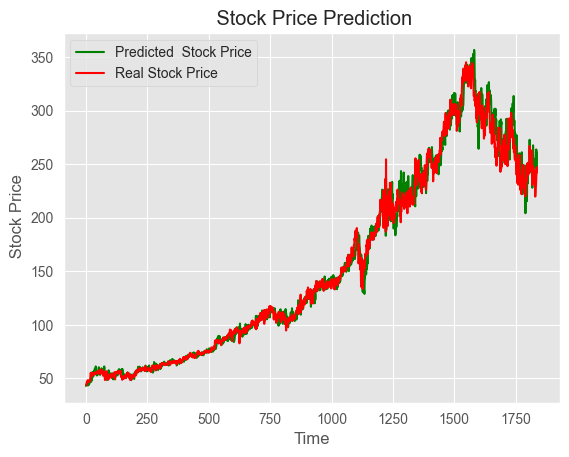

In [105]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = df2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [106]:
def predict_given_date(data, date, feature_length):
    if date not in data.index:
        data.loc[pd.Timestamp(date)]=0
    idx = data.index.get_loc(date)
    close_col = data.iloc[:,3:4]
    close_col = close_col.iloc[idx - feature_length : idx,:].values
    close_col = np.expand_dims(Scaler.transform(close_col) , axis = 0)
    Prediction = model.predict(close_col)
    Prediction = Scaler.inverse_transform(Prediction)
    return Prediction 

In [107]:
predict_given_date(df2, '2023-01-17 00:00:00-05:00', feature_length=100)

NameError: name 'Scaler' is not defined

In [120]:
# from sklearn.metrics import accuracy_score
# acc = accuracy_score(test_Y, predicted, normalize=True)
# print(acc)
model.evaluate(test_X, test_Y)

58/58 [==============================] - 18s 14ms/step - loss: 31275.2715 - mse: 31275.2715 - mae: 153.8954


[31275.271484375, 31275.271484375, 153.89544677734375]

In [143]:
df.tail(10)

Open       High        Low      Close  Adj Close  \
4630                 85.980003  88.669998  85.830002  88.419998  88.419998   
4631                 89.180000  91.599998  89.010002  91.519997  91.519997   
4632                 91.480003  91.870003  89.750000  91.129997  91.129997   
4633                 90.849998  92.190002  90.129997  92.120003  92.120003   
4634                 92.059998  92.250000  90.050003  91.290001  91.290001   
2022-10-11 00:00:00   0.000000   0.000000   0.000000   0.000000   0.000000   
2022-01-19 00:00:00   0.000000   0.000000   0.000000   0.000000   0.000000   
2022-01-18 00:00:00   0.000000   0.000000   0.000000   0.000000   0.000000   
2023-01-18 00:00:00   0.000000   0.000000   0.000000   0.000000   0.000000   
2023-01-17 00:00:00   0.000000   0.000000   0.000000   0.000000   0.000000   

                       Volume  MA for 10 days  MA for 50 days  \
4630                 30467800       87.726999         92.5738   
4631                 26862000       88.139999         92.4784   
4632                 30258100       88.650999         92.4108   
4633                 26309900       89.017999         92.4438   
4634                 32561200       89.323999         92.5302   
2022-10-11 00:00:00         0        0.000000          0.0000   
2022-01-19 00:00:00         0        0.000000          0.0000   
2022-01-18 00:00:00         0        0.000000          0.0000   
2023-01-18 00:00:00         0        0.000000          0.0000   
2023-01-17 00:00:00         0        0.000000          0.0000   

                     MA for 100 days  Daily Return  
4630                         98.1701      0.004544  
4631                         97.8836      0.035060  
4632                         97.6228     -0.004261  
4633                         97.4016      0.010864  
4634                         97.1759     -0.009010  
2022-10-11 00:00:00           0.0000      0.000000  
2022-01-19 00:00:00           0.0000      0.000000  
2022-01-18 00:00:00           0.0000      0.000000  
2023-01-18 00:00:00           0.0000      0.000000  
2023-01-17 00:00:00           0.0000      0.000000

In [114]:
test_Y = test_Y.reshape((1838, 1))

In [116]:
test_Y

array([[ 43.61482989],
       [ 43.85536382],
       [ 45.55858135],
       ...,
       [242.54232863],
       [247.15961037],
       [242.16952802]])

In [117]:
predicted

array([[ 42.95391 ],
       [ 44.088795],
       [ 44.370995],
       ...,
       [261.64465 ],
       [260.98923 ],
       [244.79158 ]], dtype=float32)

In [123]:
from sklearn.model_selection import train_test_split

x=[]
y=[]
window_size=100

for i in range(1, len(df)-window_size-1, 1):
    first = df.iloc[i, 2] # take the high/low/closing value [1 or 2 or 3]
    temp=[]
    temp2=[]
    for j in range(window_size):
        temp.append((df.iloc[i+j, 2]-first)/first)
    temp2.append((df.iloc[i+window_size, 2]-first)/first)
    x.append(np.array(temp).reshape(100, 1))
    y.append(np.array(temp2).reshape(1,1))

In [138]:
df.iloc[1,3]

4.8433427810668945

In [140]:
x

[array([[ 0.        ],
        [-0.01387299],
        [ 0.0045036 ],
        [ 0.00491777],
        [ 0.02836729],
        [ 0.01827332],
        [-0.0061082 ],
        [-0.02619306],
        [-0.06656982],
        [-0.08743124],
        [-0.07262654],
        [-0.04130847],
        [-0.0354073 ],
        [-0.00755755],
        [-0.0131999 ],
        [ 0.05425014],
        [ 0.06537949],
        [ 0.04876285],
        [ 0.01206145],
        [ 0.00698833],
        [-0.01925662],
        [-0.04104965],
        [-0.03680506],
        [-0.06304981],
        [-0.00051754],
        [ 0.0057977 ],
        [ 0.01879086],
        [ 0.0180143 ],
        [-0.01444232],
        [-0.02339783],
        [-0.05668289],
        [-0.03970386],
        [-0.03794381],
        [-0.05787332],
        [-0.04565672],
        [-0.04591573],
        [-0.04198156],
        [-0.03183561],
        [-0.0424991 ],
        [-0.06739806],
        [-0.08168552],
        [-0.08297952],
        [-0.10668785],
        [-0